# Portada

Trabajo Final Lenguajes 2025

Integrantes:


*   Nicolás Torandell Ballesteros
*   Marcos Giordano
*   Gonzalo Redondo

Lenguajes
Docente: Juan Ignacio Torres

En este trabajo analizamos el dataset TMDB 5000 Movies, que contiene información de presupuesto, recaudación, géneros, duración y calificaciones de miles de películas.

# Objetivos del análisis

El objetivo es aplicar técnicas de análisis exploratorio, estadística descriptiva y visualización para identificar patrones relevantes en la industria cinematográfica.

Mas especificamente nos dedicaremos a los siguientes objetivos:

*   Analizar la rentabilidad de los géneros más populares.
*   Explorar la relación entre presupuesto y calificación.
*   Evaluar la evolución del tiempo de duración de las películas en las últimas décadas.

# Descripción de los datasets

analizaremos los datasets:

*   tmdb 5000 movies (pelis)
*   tmdb 5000 credits (cred)

el primero contiene todo lo relativo a la pelicula, como genero, recaudacion, palabras clave, idioma, popularidad
el segundo contiene el nombre, los actores y los miembros de rodaje

# Lectura de datos

En esta sección leeremos los datasets y los uniremos de modo que solo tengamos que trabajar con uno solo y evitemos confuciones y problemas a futuro

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import zipfile
import numpy as np
import ast
import json
import os



In [ ]:
pelis_url = "https://raw.githubusercontent.com/Gonzaredondo/TP-FINAL-LENGUAJES/refs/heads/main/tmdb_5000_movies.csv"
pelis =pd.read_csv(pelis_url)
!wget https://raw.githubusercontent.com/Gonzaredondo/TP-FINAL-LENGUAJES/main/tmdb_5000_credits.zip -O tmdb_5000_credits.zip
with zipfile.ZipFile("tmdb_5000_credits.zip", "r") as zip_ref:
    zip_ref.extractall(".")
cred = pd.read_csv("tmdb_5000_credits.csv")
cred = cred.rename(columns={"movie_id": "id"})

--2025-12-02 22:54:50--  https://raw.githubusercontent.com/Gonzaredondo/TP-FINAL-LENGUAJES/main/tmdb_5000_credits.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7653954 (7.3M) [application/zip]
Saving to: ‘tmdb_5000_credits.zip’

tmdb_5000_credits.z 100%[===================>]   7.30M  --.-KB/s    in 0.08s   

2025-12-02 22:54:50 (87.2 MB/s) - ‘tmdb_5000_credits.zip’ saved [7653954/7653954]



In [ ]:
df = pelis.merge(cred, on="id", how="left")

# Inspección inicial (EDA básico)

en esta parte vamos a hacer una exploracion inicial de los datos, viendo que tenemos que tener en cuenta, que debemos de verificar o analizar, que debemos de rellenar o hacer algun trateamiento especial

In [ ]:
# ver cantidad de (filas, columnas) que tiene el dataset
df.shape

(4803, 23)

In [ ]:
# observar los primeros datos
df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
# ver la informacion general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
# estadisticas numericas basicas
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [ ]:
# ver la cantidad de datos nulos
df.isna().sum()

,0
budget,0
genres,0
homepage,3091
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0
production_companies,0


## Concluciones del EDA
El dataset tiene 4803 peliculas en 23 columnas
Tambien podemos decir a travez del info() que la mayoria de columnas son de tipo object asi que se van a tener que analizar más tarde, las demas son de un tipo numerico
Podemos ver que hay 3091 nulos en homepage y 844 en tagline, dado que son columnas que no nos importan para el analisis que haremos podemos si queremos eliminarlas del dataset
Ademas el budget(presupuesto), revenue (ganacias) y runtime (tiempo de la pelicula) tienen valores 0 lo cual es raro y habra que analizarlo y manejarlo de alguna forma
Tras la fusion quedaron 2 variables como title_x y title_y que tienen valores duplicados y habra que eliminar una de ellas


# Limpieza y preprocesamiento
*   Conversión de fechas
*   Extraer año y década
*   Procesar columnas JSON
*   Crear listas limpias
*   Eliminación o imputación de nulos
*   Crear ROI = revenue / budget


In [ ]:
# quitar columnas innesesarias
columnasAEliminar = ["homepage", "status", "title_y","title_x"]
df = df.drop(columns=[c for c in columnasAEliminar if c in df.columns])

In [ ]:
# trasformamos datos numericos y los errores a NaN
df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")
df["budget"] = pd.to_numeric(df["budget"], errors="coerce")
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce")
df["runtime"] = pd.to_numeric(df["runtime"], errors="coerce")

In [ ]:
# trasformar los 0 sin sentido a NaN
ceroAError = ["budget", "revenue", "runtime"]
for c in ceroAError:
    df.loc[df[c] == 0, c] = np.nan

df[ceroAError].isna().sum()

,0
budget,1037
revenue,1427
runtime,37


In [ ]:
# ver que no haya duplicados
before = len(df)
df = df.drop_duplicates(subset=["id"])
after = len(df)
print(f"Duplicados removidos: {before-after}")


Duplicados removidos: 0


In [ ]:
# las columnas que estan en formato json vamos a cargarlas como tal para luego pasarlas a listas
df["genres"] = df["genres"].apply(lambda x: json.loads(x))
df["keywords"] = df["keywords"].apply(lambda x: json.loads(x))
df["production_companies"] = df["production_companies"].apply(lambda x: json.loads(x))
df["spoken_languages"] = df["spoken_languages"].apply(lambda x: json.loads(x))
df["production_countries"] = df["production_countries"].apply(lambda x: json.loads(x))
df["cast"] = df["cast"].apply(lambda x: json.loads(x))
df["crew"] = df["crew"].apply(lambda x: json.loads(x))


In [ ]:
# convertimos los json a listas simples y analizables
df["genres"] = df["genres"].apply(
    lambda g: [x["name"] for x in g] if isinstance(g, list) else []
)
df["keywords"] = df["keywords"].apply(
    lambda g: [x["name"] for x in g] if isinstance(g, list) else []
)
df["production_companies"] = df["production_companies"].apply(
    lambda g: [x["name"] for x in g] if isinstance(g, list) else []
)
df["spoken_languages"] = df["spoken_languages"].apply(
    lambda g: [x["name"] for x in g] if isinstance(g, list) else []
)
df["production_countries"] = df["production_countries"].apply(
    lambda g: [x["name"] for x in g] if isinstance(g, list) else []
)

In [ ]:
# vamos a convertir los actores en su propia lista y los miembros del reparto más importantes
# como los directores, escritores y compositores
def extract_cast_names(cast_list):
    if not isinstance(cast_list, list):
        return []
    return [person.get("name") for person in cast_list if "name" in person]

df["actors"] = df["cast"].apply(extract_cast_names)

def extract_crew_roles(crew_list):
    if not isinstance(crew_list, list):
        return {
            "directors": [],
            "writers": [],
            "composers": []
        }

    directors = []
    writers = []
    composers = []

    for person in crew_list:
        job = person.get("job", "").lower()
        name = person.get("name")

        if name:
            if "director" in job:
                directors.append(name)
            if "writer" in job or "screenplay" in job:
                writers.append(name)
            if "composer" in job or "music" in job:
                composers.append(name)

    return {
        "directors": directors,
        "writers": writers,
        "composers": composers
    }

df["crew_info"] = df["crew"].apply(extract_crew_roles)

df["directors"] = df["crew_info"].apply(lambda x: x["directors"])
df["writers"]   = df["crew_info"].apply(lambda x: x["writers"])
df["composers"] = df["crew_info"].apply(lambda x: x["composers"])

df = df.drop(columns=["crew_info"])

In [ ]:
# como ya organizamos estas 2 columnas se pueden quitar
cols_to_drop = ["cast", "crew"]
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

In [ ]:
df.head()


,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,actors,directors,writers,composers
0,237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,2.787965e+09,162.0,"[English, Español]",Enter the World of Pandora.,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[James Cameron, Kevin Ishioka, Kim Sinclair, M...","[James Cameron, James Cameron]","[James Horner, Dick Bernstein]"
1,300000000.0,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,9.610000e+08,169.0,[English],"At the end of the world, the adventure begins.",6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski]","[Ted Elliott, Terry Rossio]","[Hans Zimmer, Bob Badami, Melissa Muik, Barbar..."
2,245000000.0,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",...,8.806746e+08,148.0,"[Français, English, Español, Italiano, Deutsch]",A Plan No One Escapes,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Sam Mendes, Chris Lowe, Roxana Alexandru , Ho...","[John Logan, Robert Wade, Neal Purvis, Jez But...","[Thomas Newman, Bill Bernstein, Peter Clarke]"
3,250000000.0,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],...,1.084939e+09,165.0,[English],The Legend Ends,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Christopher Nolan, Wally Pfister, Naaman Mars...","[Christopher Nolan, Jonathan Nolan]","[Hans Zimmer, Ryan Rubin]"
4,260000000.0,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],...,2.841391e+08,132.0,[English],"Lost in our world, found in another.",6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Daniel Mindel, Naaman Marshal...","[Andrew Stanton, Michael Chabon, Mark Andrews]","[Michael Giacchino, Stephen M. Davis]"


# EDA general

Gráficos simples que describen el dataset:

Distribución de vote_average.

Distribución de runtime.

Conteo de géneros más comunes.

Conteo de idiomas originales.

Cada gráfico debe tener interpretación textual, no solo mostrar la imagen.

Ejemplo de interpretación:

La mayoría de las películas tienen un runtime entre 90 y 120 minutos, lo que coincide con los estándares comerciales de la industria.

# Distribucion del promedio de votos

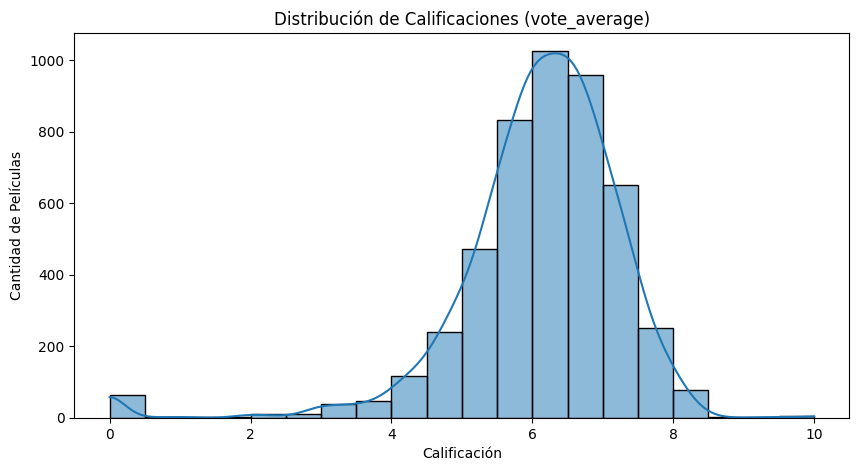

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df["vote_average"].dropna(), bins=20, kde=True)
plt.title("Distribución de Calificaciones (vote_average)")
plt.xlabel("Calificación")
plt.ylabel("Cantidad de Películas")
plt.show()

La distribución de calificaciones se concentra mayormente entre 5 y 7 puntos, lo que sugiere que la mayoría de las películas reciben evaluaciones regulares. Se observan pocos casos extremos, tanto de muy alta como de muy baja puntuación, indicando que las valoraciones del público suelen ser moderadas.

# Distribucion de duracion de peliculas

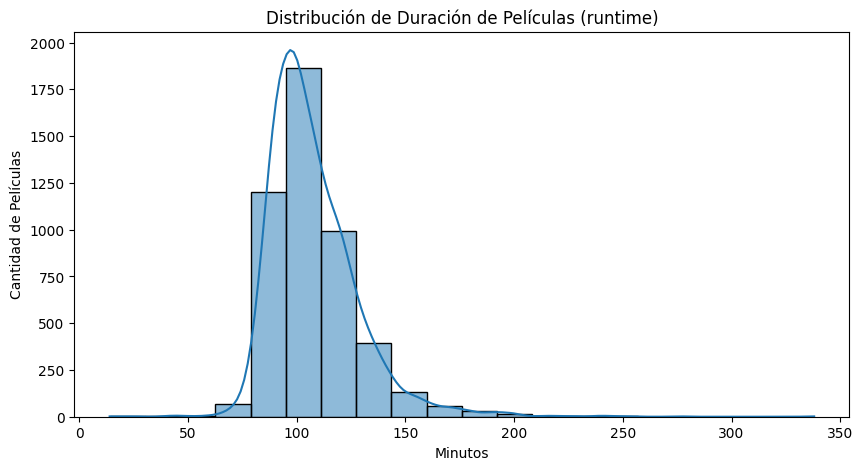

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df["runtime"].dropna(), bins=20, kde=True)
plt.title("Distribución de Duración de Películas (runtime)")
plt.xlabel("Minutos")
plt.ylabel("Cantidad de Películas")
plt.show()


La mayor parte del cine comercial tiene una duración entre 90 y 120 minutos, coincidiendo con estándares de la industria para mantener la atención del público. Las películas muy cortas o muy largas son menos frecuentes y pueden considerarse como outliers dentro del dataset

# Frecuencia de géneros

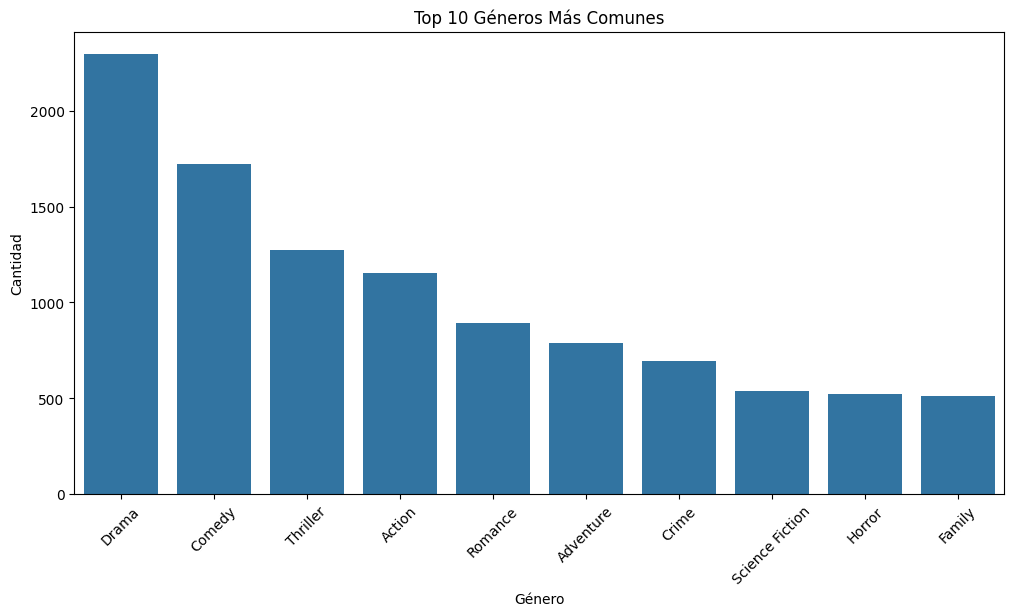

In [ ]:
todos_los_generos = [g for lista in df["genres"] for g in lista]
generos_freq = Counter(todos_los_generos).most_common(10)
gen_df = pd.DataFrame(generos_freq, columns=["Género", "Cantidad"])

plt.figure(figsize=(12,6))
sns.barplot(data=gen_df, x="Género", y="Cantidad")
plt.title("Top 10 Géneros Más Comunes")
plt.xticks(rotation=45)
plt.show()

Drama, Comedy y Thriller son los géneros con mayor presencia en el dataset,
lo que refleja la relevancia de estos estilos en la industria cinematográfica.
En contraposición, géneros como Western o War muestran menor producción,
enfocados en audiencias más específicas.

# Idiomas originales mas comunes

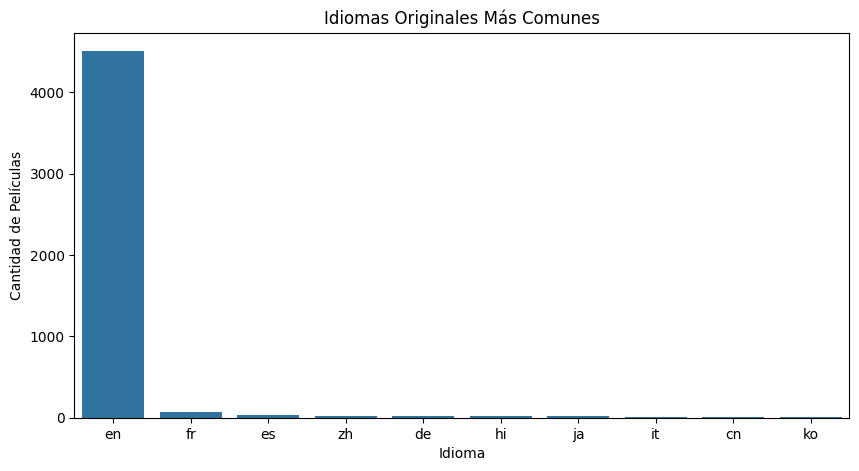

In [ ]:
idiomas_freq = df["original_language"].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=idiomas_freq.index, y=idiomas_freq.values)
plt.title("Idiomas Originales Más Comunes")
plt.xlabel("Idioma")
plt.ylabel("Cantidad de Películas")
plt.show()

El inglés es el idioma dominante debido al rol de Hollywood como principal productor de cine a nivel mundial. Otros idiomas como francés, español y japonés presentan participación, aunque considerablemente menor. Esto evidencia un sesgo hacia el cine angloparlante en el dataset analizado.

# Análisis específicos

*   Rentabilidad de los géneros más populares.
*   Relación entre presupuesto y calificación.
*   Evolución del tiempo de duración de las películas en las últimas décadas.

In [ ]:
# crear las columnas que vamos a usar
df["ganancias"] = df["revenue"] - df["budget"]
df["ROI"] = df["revenue"] / df["budget"]
df["año de lanzamiento"] = df["release_date"].dt.year
df["decadas"] = (df["año de lanzamiento"] // 10) * 10

# EJE 1 — Rentabilidad de los géneros más populares
## 1.A — La pregunta

¿Los géneros cinematográficos más populares también son los más rentables?

Queremos analizar si la popularidad de un género (medida a partir de la variable popularity) está asociada con una mayor rentabilidad económica (revenue – budget).

## 1.B — Metodología

* Expandir la columna genres para que cada película aparezca una vez por género.
* Calcular para cada película su rentabilidad = revenue − budget.
* Agrupar por género y obtener:
* * promedio de popularidad
* * promedio de rentabilidad
* * cantidad de películas por género
* Seleccionar los géneros con mayor cantidad de películas (para evitar géneros raros con pocos datos).
* Comparar popularidad y rentabilidad para evaluar si existe relación.

In [ ]:
# 1.C
# Expandir la lista de géneros: una fila por género
df_genres = df.explode("genres").copy()

In [ ]:
genre_stats = df_genres.groupby("genres").agg(
    avg_popularity = ("popularity", "mean"),
    avg_profit = ("ganancias", "mean"),
    count_movies = ("id", "count")
).sort_values("count_movies", ascending=False)


In [ ]:
genre_stats_filtered = genre_stats[genre_stats["count_movies"] >= 50]

In [ ]:
genre_stats_filtered

,avg_popularity,avg_profit,count_movies
genres,,,
Drama,17.764853,5.194328e+07,2297
Comedy,18.221001,7.232391e+07,1722
Thriller,24.460077,6.923375e+07,1274
Action,30.940382,1.144244e+08,1154
Romance,15.962426,6.426381e+07,894
Adventure,39.268042,1.707142e+08,790
Crime,22.853274,5.314782e+07,696
Science Fiction,36.451806,1.259568e+08,535
Horror,18.295915,4.716959e+07,519


## 1.D — Gráficos

Scaterplot: popularidad vs rentabilidad

Barplot: popularidad promedio por género

bublechart: popularidad promedio vs rentabilidad promedio (por género)

Estos gráficos permiten ver si efectivamente la popularidad predice rentabilidad.

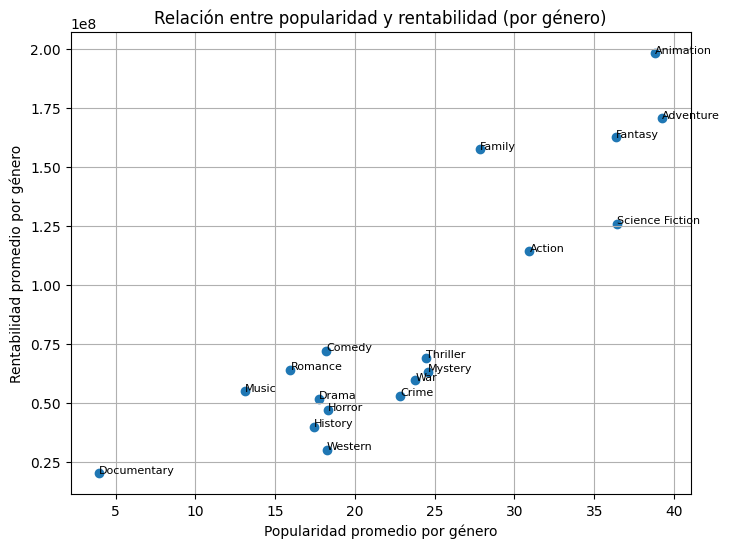

In [ ]:
# Scaterplot
plt.figure(figsize=(8,6))
plt.scatter(
    genre_stats_filtered["avg_popularity"],
    genre_stats_filtered["avg_profit"]
)

for genre, row in genre_stats_filtered.iterrows():
    plt.text(
        row["avg_popularity"],
        row["avg_profit"],
        genre,
        fontsize=8
    )

plt.xlabel("Popularidad promedio por género")
plt.ylabel("Rentabilidad promedio por género")
plt.title("Relación entre popularidad y rentabilidad (por género)")
plt.grid(True)
plt.show()

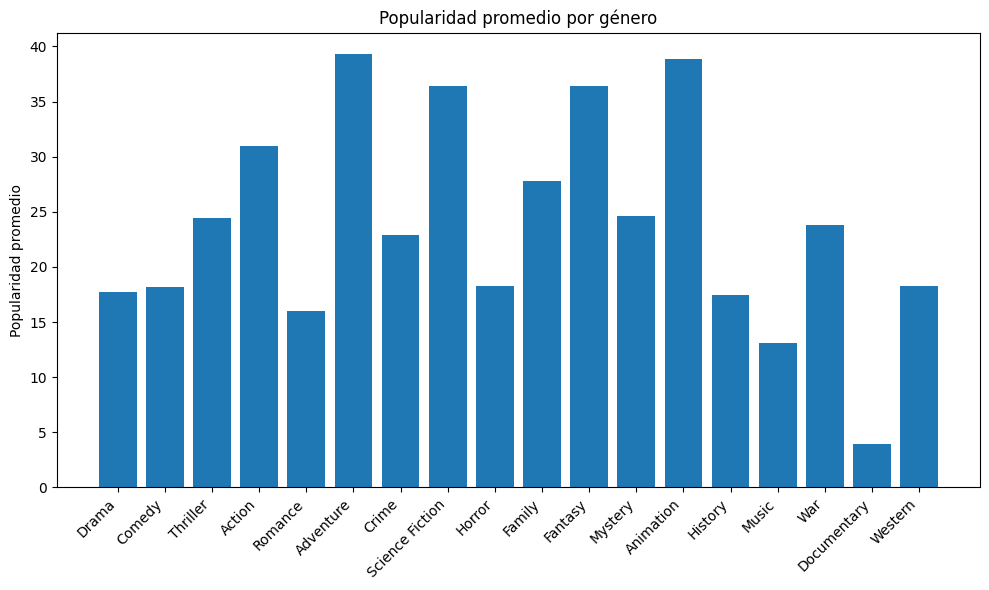

In [ ]:
# barplot
plt.figure(figsize=(10,6))
plt.bar(
    genre_stats_filtered.index,
    genre_stats_filtered["avg_popularity"]
)

plt.xticks(rotation=45, ha='right')
plt.ylabel("Popularidad promedio")
plt.title("Popularidad promedio por género")
plt.tight_layout()
plt.show()

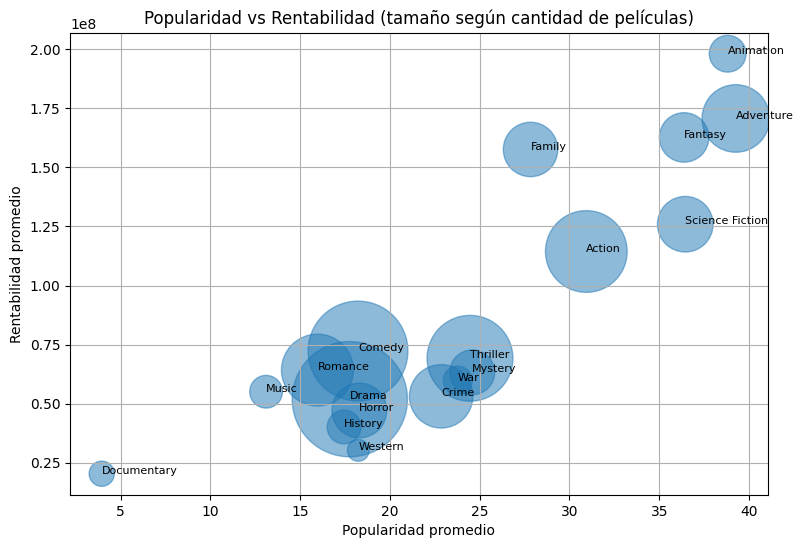

In [ ]:
# bublechart
plt.figure(figsize=(9,6))
plt.scatter(
    genre_stats_filtered["avg_popularity"],
    genre_stats_filtered["avg_profit"],
    s=genre_stats_filtered["count_movies"] * 3,  # tamaño proporcional
    alpha=0.5
)

for genre, row in genre_stats_filtered.iterrows():
    plt.text(row["avg_popularity"], row["avg_profit"], genre, fontsize=8)

plt.xlabel("Popularidad promedio")
plt.ylabel("Rentabilidad promedio")
plt.title("Popularidad vs Rentabilidad (tamaño según cantidad de películas)")
plt.grid(True)
plt.show()

## 1.E — Interpretación

El estudio denota una marcada relación entre la popularidad de un genero y la rentabilidad económica. Cuando un genero es más popular entre el público, tiende a generar mayor retorno financiero para la industria. Aunque siempre hay excepciones ya que algunos géneros obtienen mejor rendimiento del que se espera según su popularidad.

Cómo es el caso de la animación, que es el género más rentable de toda la industria, incluso generando menos películas que los demás géneros. Otro ejemplo es el género familiar, con una eficiencia económica notable y unas buenas ganancias en relación a su popularidad.

En contraste a esto géneros como documentales, western e historicos tienen los peores resultados, debido a que formar parte de nichos específicos los cuales no atraen a grandes audiencias y algunas veces poseen presupuestos muy elevados.

Por otro lado géneros como drama, crimen y horror muestran una rentabilidad moderada en cuanto a su popularidad, pero son producidas en gran cantidad debido a que suele requerir presupuestos más bajos.

Por último géneros como aventura, fantasía y ciencia ficción se posicionan como la apuesta más segura dentro del mercado por su alta rentabilidad, esto es debido a la alta demanda por el público.


# EJE 2 — Relación entre presupuesto y calificación
## 2.A — Formulación de la pregunta

¿Las películas con mayor presupuesto reciben mejores calificaciones?
Buscamos analizar si existe relación entre budget y vote_average.

## 2.B — Metodología

* Seleccionar las columnas budget y vote_average.
* Eliminar valores nulos o presupuestos iguales a cero.
* Transformar el presupuesto con logaritmo (los valores son muy grandes y distorsionan los gráficos).
* Graficar la relación usando:
* * scatterplot
* *cálculo de correlación
* Evaluar si el presupuesto influye en la opinión del público.

In [ ]:
# 2.C
df_budget = df[["budget", "vote_average"]].copy()

# Eliminar valores nulos o presupuestos = 0
df_budget = df_budget.dropna()
df_budget = df_budget[df_budget["budget"] > 0]


In [ ]:
#para evitar errores con numeros tan grandes de miles de millones usamos el logaritmo para reducir esos numeros
df_budget["log_budget"] = np.log10(df_budget["budget"])

In [ ]:
correlacion = df_budget["log_budget"].corr(df_budget["vote_average"])
correlacion


np.float64(0.04912183803499038)

## 2.D — Gráficos sugeridos

Scatterplot: budget_log vs vote_average

Lineplot suavizado (opcional): tendencia general

Boxplot: vote_average por cuartiles de presupuesto

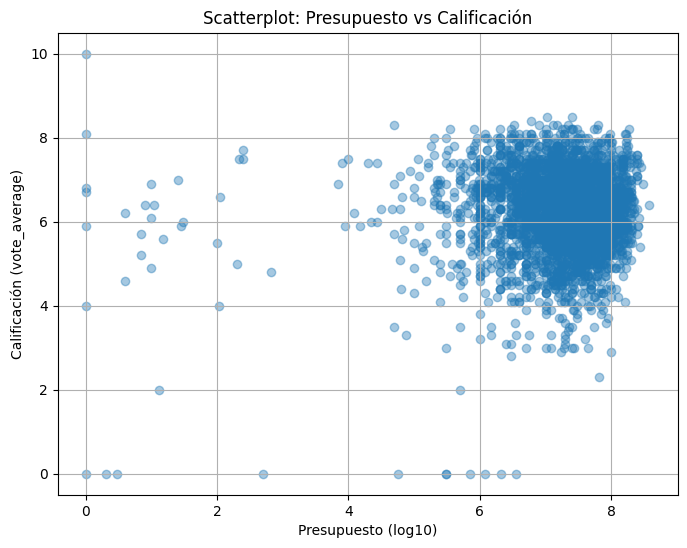

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df_budget["log_budget"], df_budget["vote_average"], alpha=0.4)

plt.xlabel("Presupuesto (log10)")
plt.ylabel("Calificación (vote_average)")
plt.title("Scatterplot: Presupuesto vs Calificación")
plt.grid(True)
plt.show()

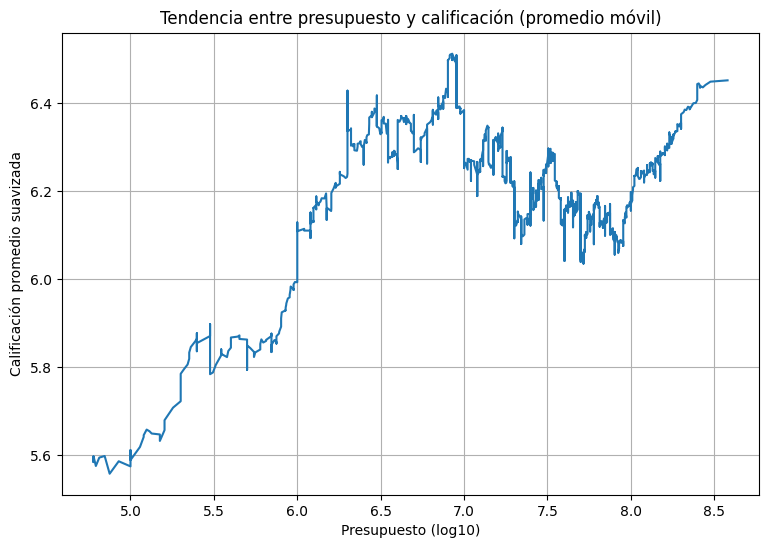

In [ ]:
df_sorted = df_budget.sort_values("log_budget")

df_sorted["rolling_vote"] = df_sorted["vote_average"].rolling(window=200, min_periods=50).mean()

plt.figure(figsize=(9,6))
plt.plot(df_sorted["log_budget"], df_sorted["rolling_vote"])

plt.xlabel("Presupuesto (log10)")
plt.ylabel("Calificación promedio suavizada")
plt.title("Tendencia entre presupuesto y calificación (promedio móvil)")
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

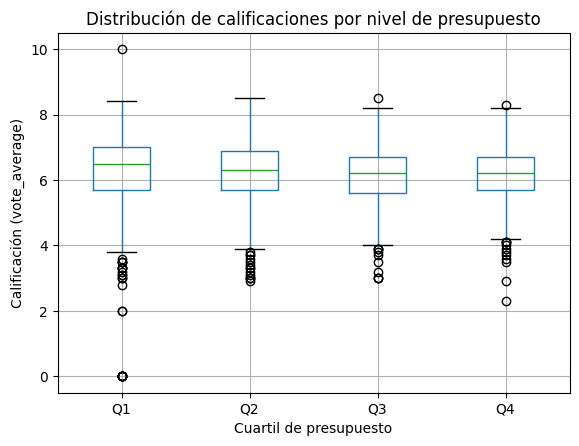

In [ ]:
df_budget["budget_quartile"] = pd.qcut(df_budget["log_budget"], q=4, labels=["Q1","Q2","Q3","Q4"])

plt.figure(figsize=(8,6))
df_budget.boxplot(column="vote_average", by="budget_quartile")

plt.xlabel("Cuartil de presupuesto")
plt.ylabel("Calificación (vote_average)")
plt.title("Distribución de calificaciones por nivel de presupuesto")
plt.suptitle("")  # elimina el título automático feo
plt.grid(True)
plt.show()

## 2.E — Interpretación

A partir de este análisis visual, se observa una relación positiva pero débil entre el presupuesto de una película y su calificación.

En el grafico de dispersión se aprecia que, en bajos niveles de presupuesto, las calificaciones presentan mucha variabilidad.
A medida que el presupuesto aumenta, la dispersión disminuye y las calificaciones se ubican en rangos más altos. Lo cual sugiere que una mayor inversión ayuda a evitar resultados malos, aunque esto no asegure una calificación sobresaliente.

El diagrama de cajas de fuerza refuerza la interpretación. La calificación mediana promedio es prácticamente la misma en todos los niveles de presupuesto. Sin embargo todos los cuartiles aparecen numerosas películas consideradas malas, por lo que el riesgo de fracaso existe en cualquier escala de inversión.

La tendencia suavizada mediante promedio móvil, denota un crecimiento gradual en la calificación promedio conforme aumenta el presupuesto. Sin embargo,  este se estabiliza y se vuelve irregular en presupuestos aún mas altos, lo que confirma que una inversión mejorará hasta cierto punto, pasado este punto los beneficios adicionales son minúsculos.

# EJE 3 — Evolución del tiempo de duración de las películas por década
## 3.A — Formulación de la pregunta

¿Las películas se han vuelto más largas con el tiempo?
Se busca analizar la evolución del runtime a lo largo de las últimas décadas.

## 3.B — Metodología

Extraer el año de lanzamiento (si no lo tenés, te digo cómo obtenerlo).

Convertir el año a década, por ejemplo:

1994 → 1990

2008 → 2000

Calcular el runtime promedio por década.

Graficar la tendencia.

In [ ]:
#3.C
df_runtime = df[(df["runtime"] >= 20) & (df["runtime"] <= 300)].copy()


In [ ]:
runtime_decade = df_runtime.groupby("decadas")["runtime"].mean().reset_index()
runtime_decade


,decadas,runtime
0,1910.0,197.000000
1,1920.0,128.250000
2,1930.0,110.933333
3,1940.0,110.880000
4,1950.0,120.481481
5,1960.0,130.225352
6,1970.0,116.256881
7,1980.0,110.643885
8,1990.0,110.650773
9,2000.0,105.904365


## 3.D — Gráficos sugeridos

Lineplot: duración promedio por década

Boxplot por década (para ver dispersión)

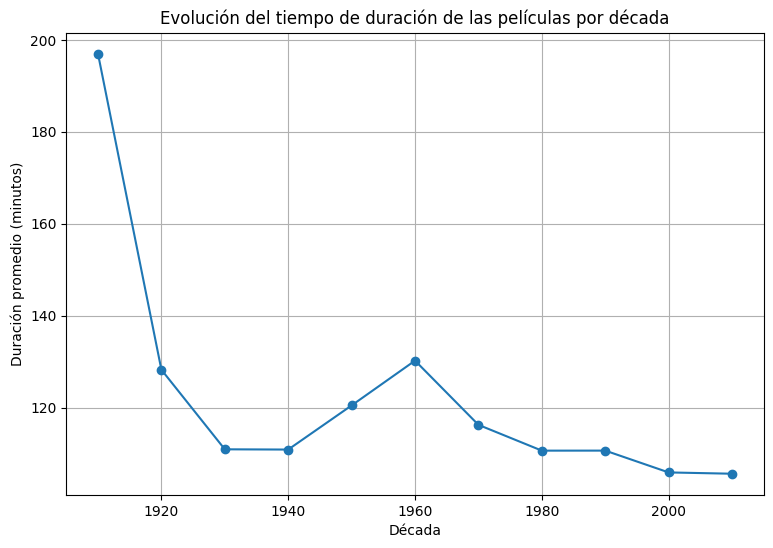

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(runtime_decade["decadas"], runtime_decade["runtime"], marker="o")

plt.xlabel("Década")
plt.ylabel("Duración promedio (minutos)")
plt.title("Evolución del tiempo de duración de las películas por década")
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

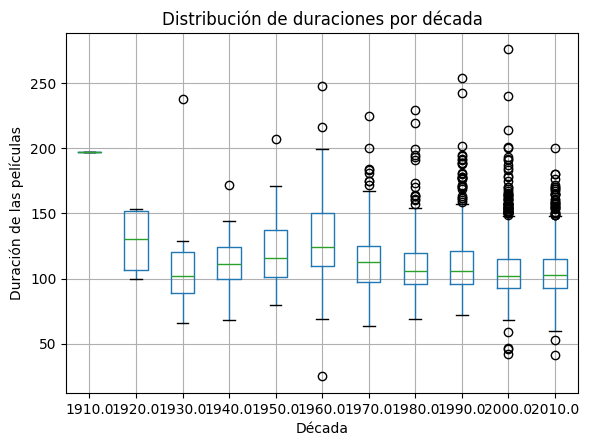

In [ ]:
plt.figure(figsize=(10,6))
df_runtime.boxplot(column="runtime", by="decadas")

plt.xlabel("Década")
plt.ylabel("Duración de las películas")
plt.title("Distribución de duraciones por década")
plt.suptitle("")  # quitar el título automático
plt.grid(True)
plt.show()


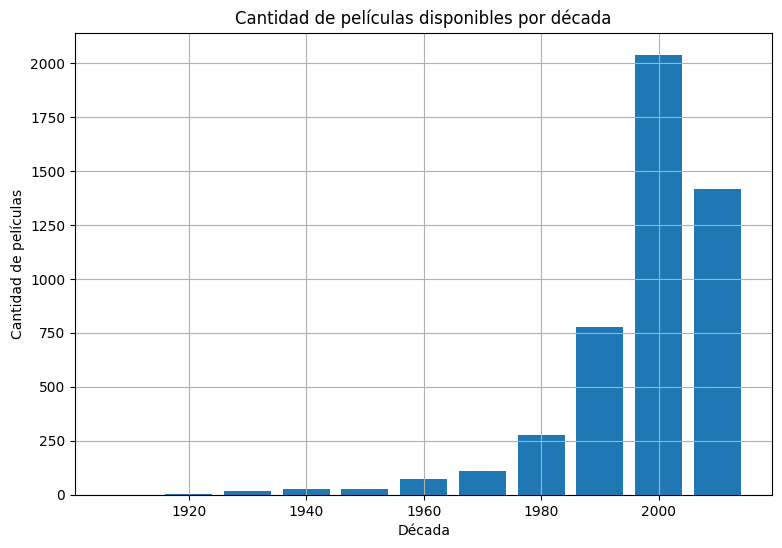

In [ ]:
movies_per_decade = df_runtime["decadas"].value_counts().sort_index()

plt.figure(figsize=(9,6))
plt.bar(movies_per_decade.index, movies_per_decade.values, width=8)

plt.xlabel("Década")
plt.ylabel("Cantidad de películas")
plt.title("Cantidad de películas disponibles por década")
plt.grid(True)
plt.show()


## 3.E — Interpretación


El análisis de datos muestra una marcada evolución en la industria, tanto en la calidad como en la duración promedio de las películas. Conforme avanza el tiempo, se observa una tendencia a la estandarización del tiempo de duración, así como el aumento de la cantidad de producciones.

Durante más primeras décadas, en el cine la producción era limitada, creciendo  progresivamente. Pero fue en los años 80 que se dió un punto de inflexión, dónde se da un gran aumento de estrenos. Siendo la década del 2000 el periodo con mayor volumen de películas en la base de datos.

En cuanto a la duración las películas de comienzos del siglo XX eran más largas, con promedios más cerca a los 200 minutos en 1910. Con el desarrollo del lenguaje cinematográfico, la duración descendió hasta estabilizarse en los 110 minutos en los años 30 y 40.  Posteriormente en los 50 y 60 se ve un leve aumento de grandes producciones épicas. La duración en los 70 se vuelve a ajustar y se mantiene entre los 100 y 110.

El estudio de la distribución por década confirma la estandarización. Siendo alta en las primeras décadas pero reduciéndose en el siglo XX en adelante. Sin embargo existen casos aislados, espacialmente en los 60.
Hoy en día las películas han adoptado un formato eficiente  entre los 105 y 110 minutos, ajustadas a las necesidades del público masivo, ya que la estandarización está ligada directamente con este.

Por lo tanto para un largometraje comercial actual, la duración más adecuada se encuentra dentro de ese rango, siendo cualquier extensión una excepción marcada por el género o por decisión específicas.

Exportación a CSV/JSON para la API

Acá simplemente generás los archivos reducidos:

top_generos.json

roi_por_pais.csv

Etc.

Y explicás por qué se exportan y cómo se usarán en la mini-API.

Top géneros por ROI promedio

In [ ]:
df_generos = df.explode("genres")
top_generos_roi = (
    df_generos
    .dropna(subset=["ROI"])
    .groupby("genres")["ROI"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={"genres":"genero", "ROI":"roi_promedio"})
)

top_generos_roi.to_csv("salida/top_generos.csv", index=False)
top_generos_roi.to_json("salida/top_generos.json", orient="records", force_ascii=False)

print("Top géneros guardados en salida/top_generos.json — primeras 5 filas:")
print(top_generos_roi.head())

Top géneros guardados en salida/top_generos.json — primeras 5 filas:
        genero  roi_promedio
0       Comedy   7663.066247
1        Drama   5908.024215
2       Horror   3077.422678
3     Thriller   1074.897187
4  Documentary    160.106742


ROI promedio por idioma original

In [ ]:
roi_por_idioma = (
    df.dropna(subset=["ROI"])
      .groupby("original_language")["ROI"]
      .mean()
      .sort_values(ascending=False)
      .reset_index()
      .rename(columns={"original_language":"idioma_original", "ROI":"roi_promedio"})
)

roi_por_idioma.to_csv("salida/roi_por_idioma.csv", index=False)
roi_por_idioma.to_json("salida/roi_por_idioma.json", orient="records", force_ascii=False)

print("ROI por idioma guardado en salida/roi_por_idioma.json — primeras 5 filas:")
print(roi_por_idioma.head())

ROI por idioma guardado en salida/roi_por_idioma.json — primeras 5 filas:
  idioma_original  roi_promedio
0              en   3075.609797
1              it     13.974506
2              de      8.176070
3              es      6.778926
4              pt      5.607642


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.makedirs("salida", exist_ok=True)
df.to_csv("salida/df_processed.csv", index=False)
df.to_json("salida/df_processed.json", orient="records", force_ascii=False)

In [ ]:
from google.colab import files
files.download("salida/top_generos.json")
files.download("salida/roi_por_idioma.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Bibliografía / Fuentes

## Dataset utilizado:

Kaggle. Movies Dataset (TMDB 5000 Movies)
Kaggle. Credits Dataset (TMDB 5000 credits)
Disponible en la plataforma Kaggle, utilizado para el análisis exploratorio y construcción del dataframe base.

## Documentación oficial:

Pandas Documentation. Working with DataFrames, Groupby, Missing Values, Datetime handling.
https://pandas.pydata.org/docs/

Matplotlib Documentation. Gráficos básicos, scatterplot, barplot, lineplot.
https://matplotlib.org/stable/

NumPy Documentation. Funciones matemáticas y soporte para arrays.
https://numpy.org/doc/

## Referencias y material complementario:

Tutoriales y ejemplos de Data Analysis y EDA para gráficos comparativos y análisis descriptivo.